## 4.2.1: Introduction to GPS Tracking of Birds
In this case study, we will introduce you
to manipulating, examining, and visualizing GPS data used
to tracking birds in this way.
The data for this case study comes from the LifeWatch INBO project.
Several data sets have been released as part of this project.
We will use a small data set that consists of migration data for three
gulls named Eric, Nico, and Sanne.
The csv file contains eight columns, and includes variables
like latitude, longitude, altitude, and time stamps.
In this case study, we will first load the data,
visualize some simple flight trajectories,
track flight speed, learn about daytime and much, much more.
We have made the file bird_tracking.csv available to you on the course site

In [1]:
import pandas as pd

In [2]:
birddata=pd.read_csv("bird_tracking.csv")

In [3]:
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ix= birddata.bird_name=="Eric"
ix

0         True
1         True
2         True
3         True
4         True
         ...  
61915    False
61916    False
61917    False
61918    False
61919    False
Name: bird_name, Length: 61920, dtype: bool

In [6]:
x,y=birddata.longitude[ix],birddata.latitude[ix]

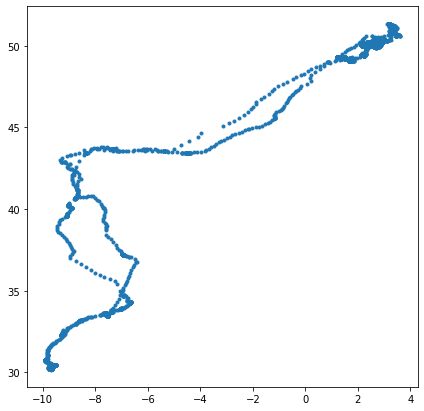

In [7]:
plt.figure(figsize=(7,7))
plt.plot(x,y,".")
plt.savefig('Eric.pdf')

Again, the flight trajectory will be substantially distorted
because we did not implement any type of cartographic projection.
Nevertheless, we get a decent sense of the flight path.

In [8]:
#getting the unique bird names
bird_names=pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

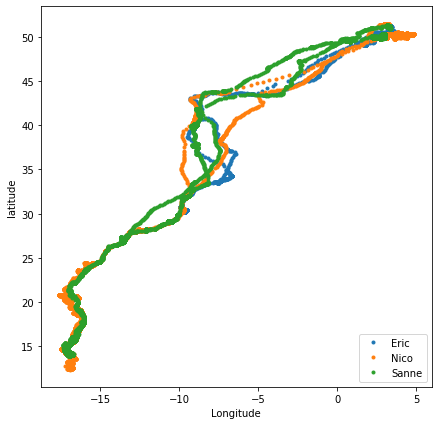

In [9]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix= birddata.bird_name==bird_name
    x,y=birddata.longitude[ix],birddata.latitude[ix]
    plt.plot(x,y,".",label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("latitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

### Examining Flight Speed

In [10]:
ix=birddata.bird_name=="Eric"

In [11]:
speed=birddata.speed_2d[ix]

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <BarContainer object of 10 artists>)

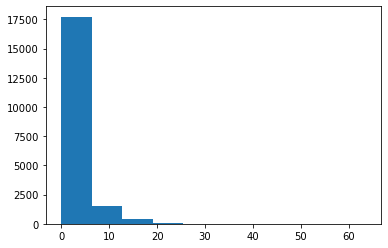

In [12]:
plt.hist(speed)

In [13]:
#checking there is a data that is not a number in speed
np.isnan(speed).any()

True

In [14]:
#Checking the numbe of numbers in the speed column
np.sum(np.isnan(speed))

85

to check the number of the non numbers, we can use a NOT to turn true to false and perform previous operation

In [15]:
ind=np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [16]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

we'll only include those entries for which ind is not equal to true.

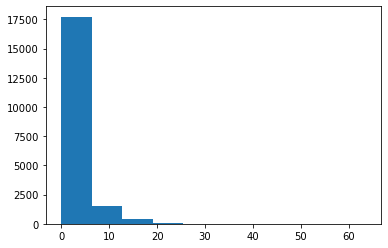

In [17]:
ix=birddata.bird_name=="Eric"
speed=birddata.speed_2d[ix]
ind=np.isnan(speed)
plt.hist(speed[~ind])
plt.savefig("hist.pdf")

I'm going to add an x label, a y label, I
will specify the locations of the bins, and I would also
like my histogram to be normalized.

Finally, I have normalized the y-axis, meaning
that an integral over the histogram would be equal to 1.
this can be done by setting `density=1`.

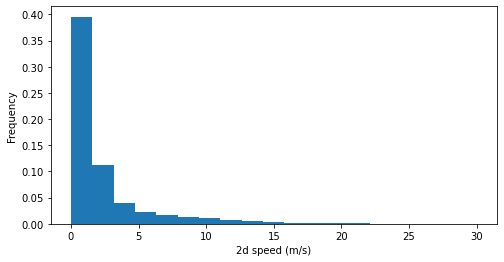

In [18]:
ix=birddata.bird_name=="Eric"
plt.figure(figsize=(8,4))
speed=birddata.speed_2d[ix]
ind=np.isnan(speed)
plt.hist(speed[~ind],bins=np.linspace(0,30,20),density=True)
plt.xlabel("2d speed (m/s)")
plt.ylabel("Frequency")
plt.savefig("hist.pdf")

Pandas provide some planning functions as well,
although less customizable than PLT plots,
they readily deal with things like NaNs.
However you want to make sure that you always
examine your data carefully and look for the presence of NaNs
before preparing your plots.

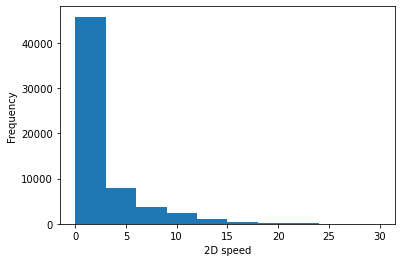

In [19]:
birddata.speed_2d.plot(kind='hist',range=[0,30])
plt.xlabel("2D speed")
plt.savefig("pd_hist.pdf")

### Using Datetime

In [20]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [21]:
import datetime

In [22]:
datetime.datetime.today()

datetime.datetime(2022, 5, 5, 9, 56, 38, 92007)

In [23]:
time_1=datetime.datetime.today()

In [24]:
time_2=datetime.datetime.today()

In [25]:
time_2-time_1

datetime.timedelta(microseconds=601481)

the output above is a time delta

If we'd like to compute how much time has passed between any two
observations in our data set, we first have
to convert the timestamps, now given as strings, to datetime objects.

the field following second is UTC,
which stands for coordinated universal time,
which is an offset that is expressed in hours.
In this case those entries are always 0, something you can check easily.
Since the offsets are all 0, we're going to ignore them moving forward.

In [26]:
date_str=birddata.date_time[0]
date_str

'2013-08-15 00:18:08+00'

To remove the utc offset

In [27]:
date_str[:-3]

'2013-08-15 00:18:08'

To convert a string to a datetime object,

In [28]:
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

We can now use this function to go over every single row in our data set,
and create a new datetime object corresponding to every single row.

In [29]:
timestamps=[]
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
                      (birddata.date_time.iloc[k][:-3],"%Y-%m-%d %H:%M:%S"))

In [30]:
timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

The next step for me is to construct a panda series object
and insert the timestamp from my Python list into that object.
I can then append the panda series as a new column in my bird data data frame.

In [31]:
birddata["timestamp"]=pd.Series(timestamps,index=birddata.index)

In [32]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [33]:
birddata.timestamp[4]-birddata.timestamp[3]

Timedelta('0 days 00:29:51')

next is to create a list that
captures the amount of time that has elapsed
since the beginning of data collection.

In [34]:
times=birddata.timestamp[birddata.bird_name=="Eric"]
elapsed_time=[time-times[0] for time in times]

In [35]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [36]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

how can we measure time in certain units, like hours or days?

In [37]:
#to know the number in days
eelapsed_time[1000]/datetime.timedelta(days=1)

NameError: name 'eelapsed_time' is not defined

In [ ]:
#to know the number in hours
elapsed_time[1000]/datetime.timedelta(hours=1)

make a plot where on the x-axis,
we have the number of the observation, and on the y-axis
we have the amount of time that has elapsed, measured in days.

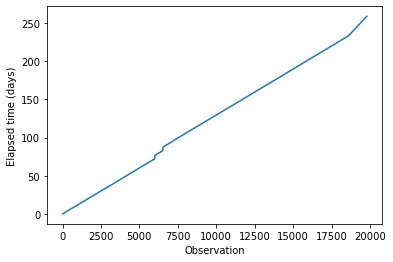

In [38]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.savefig("timeplot.pdf")

## Calculating Daily Mean Speed
 create a plot where on the y-axis,
we have the mean daily speed.
And on the x-axis, we have time measured in days.
, we'd like to be collecting indices corresponding
to different observations until we hit the next day.

In [39]:
data=birddata[birddata.bird_name=="Eric"]
times=data.timestamp
elapsed_time=[time-times[0] for time in times]
elapsed_days=np.array(elapsed_time)/datetime.timedelta(days=1)


next_day=1
inds=[]
daily_mean_speed=[]
for (i,t) in enumerate(elapsed_days):
    if t<next_day:
        inds.append(i)
    else:
        #compute daily mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day+=1
        inds=[]

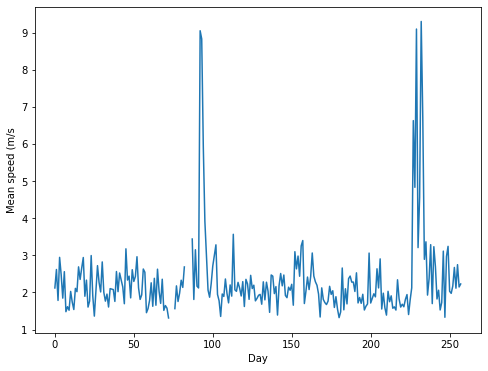

In [40]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s")
plt.savefig("dms.pdf")

So looking at the plot, we first see that we
have data for approximately 260 days.
On any given typical, or average day, Eric
is flying, on average, about 2 meters per second,
just by eyeballing the figure.
However, we can see that there seemed to be two periods within the observation
window during which Eric is flying substantially more.
These are the periods that correspond to his migration patterns.
We can see that around day, equal to 90 or 95 perhaps,
his mean daily speed is as high as 9 meters per second.
We see a similar peak for day perhaps 230 or so.
Looking at this plot, we've been able to identify when exactly Eric carries out
his migration.

In [41]:
data = birddata[birddata.bird_name == 'Sanne']
data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
40916,40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne,2013-08-15 00:01:08
40917,40917,54,2013-08-15 00:31:00+00,833,-141.804053,49.931076,2.281900,1.318484,Sanne,2013-08-15 00:31:00
40918,40918,55,2013-08-15 01:01:19+00,833,-10.651840,49.931016,2.281933,0.076158,Sanne,2013-08-15 01:01:19
40919,40919,56,2013-08-15 01:31:38+00,833,14.727689,49.931053,2.281911,0.014142,Sanne,2013-08-15 01:31:38
40920,40920,55,2013-08-15 02:01:24+00,833,-169.882200,49.931042,2.281893,0.094340,Sanne,2013-08-15 02:01:24
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


### Using the Cartopy Library

Start of transcript. Skip to the end.
Our next step is to install Cartopy, a library that
provides cartographic tools for Python.

- use jupyter lab from anaconda
- conda install -c conda-forge cartopy

In [43]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Cartopy provides several different projection alternatives.
In this case, we'll be using one of the standard projections.

In [44]:
proj=ccrs.Mercator()

We're first looping over all of our bird names.
Then we're extracting the rows from our data
frame to correspond to that particular bird.
Then we extract the longitude and latitude in variables x and y.
The final line, the plot line, is what introduces the transformation.
In this case, we're using a specific transformation from CCRS.

we created the figure using plt.axes.

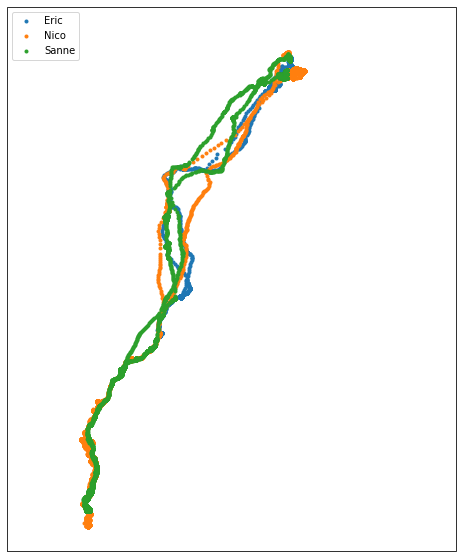

In [48]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.2,10.0)) #this is set using trial and error

for name in bird_names:
    ix=birddata['bird_name']==name
    x,y=birddata.longitude[ix],birddata.latitude[ix]
    ax.plot(x,y,'.',transform=ccrs.Geodetic(),label=name)
    
plt.legend(loc="upper left")
plt.savefig("map.pdf")

In this case, we can see the flight trajectories as before,
but in this case, we've used an actual cartographic projection.
That means that these correspond to an actual map.
In fact, we can superimpose a map on top of this.
We can add some more features to our plot.
For example, we can add land, borders of countries, and so on.

In this case, I'm adding four different lines.
These four lines add landmasses, oceans, coastlines, and borders of countries
to the map.

C:\Users\gtpservice2\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gtpservice2\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gtpservice2\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gtpservice2\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


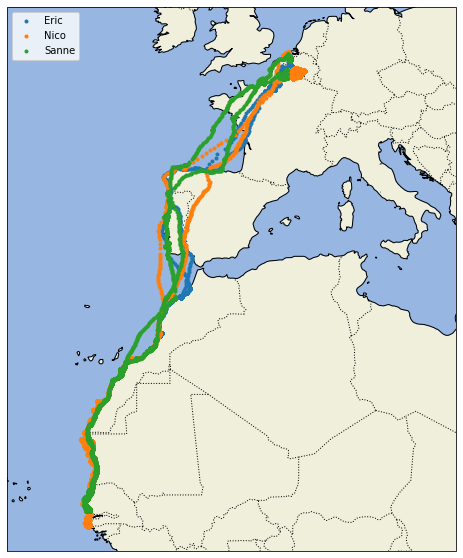

In [49]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.2,10.0)) #this is set using trial and error
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS,linestyle=':')

for name in bird_names:
    ix=birddata['bird_name']==name
    x,y=birddata.longitude[ix],birddata.latitude[ix]
    ax.plot(x,y,'.',transform=ccrs.Geodetic(),label=name)
    
plt.legend(loc="upper left")
plt.savefig("map.pdf")